# 1. Data Loading and Understanding:

In [2]:
# Importing basic necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset

data = pd.read_csv(r"C:\Users\subip\Downloads\ML Reinforcement Project Files\ipl_matches.csv")
df = data.copy()

In [4]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# 2. Data Cleaning:

In [7]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
# Percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

umpire3            84.26
city                0.93
winner              0.53
player_of_match     0.53
umpire2             0.26
umpire1             0.26
venue               0.00
win_by_wickets      0.00
win_by_runs         0.00
id                  0.00
Season              0.00
result              0.00
toss_decision       0.00
toss_winner         0.00
team2               0.00
team1               0.00
date                0.00
dl_applied          0.00
dtype: float64

In [9]:
# Dropping unnecessary columns which are not need for the prediction

df.drop(['id','umpire3','umpire2','umpire1'], axis = 1, inplace = True)

In [10]:
df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [11]:
df.dropna(subset = ['winner','city'], inplace = True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df['result'].value_counts()

result
normal    736
tie         9
Name: count, dtype: int64

In [15]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [17]:
df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [18]:
team_name_map = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad', 
    'Pune Warriors': 'Rising Pune Supergiants',
}
team_columns = ['team1', 'team2', 'toss_winner', 'winner']

for col in team_columns:
    df[col] = df[col].replace(team_name_map)

In [19]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for catogorical columns

cat_col = ['Season','city','team1','team2','toss_winner','toss_decision',
           'result','winner','venue']

le = LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])


In [21]:
# Extracting year from the data column

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['year'] = df['date'].dt.year

In [22]:
df.drop(['date'], axis = 1, inplace = True)

In [23]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,year
0,9,14,10,9,9,1,0,0,10,35,0,Yuvraj Singh,27,2017
1,9,26,6,8,8,1,0,0,8,0,7,SPD Smith,20,2017
2,9,28,2,5,5,1,0,0,5,0,10,CA Lynn,30,2017
3,9,15,8,3,3,1,0,0,3,0,6,GJ Maxwell,12,2017
4,9,2,9,1,9,0,0,0,9,15,0,KM Jadhav,16,2017


## Checking for outliers

In [25]:
df[['win_by_runs','win_by_wickets']].describe()

,win_by_runs,win_by_wickets
count,745.000000,745.000000
mean,13.444295,3.369128
std,23.599650,3.391460
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


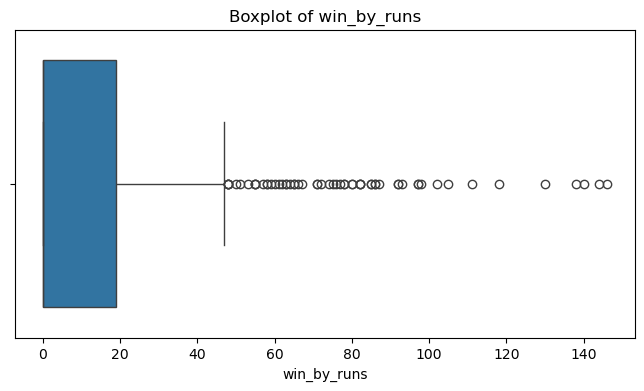

In [26]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['win_by_runs'])
plt.title('Boxplot of win_by_runs')
plt.show()

### **Inference:**
- Most matches are won by a small margin of runs.
- A few matches have very large win margins, shown as outliers.

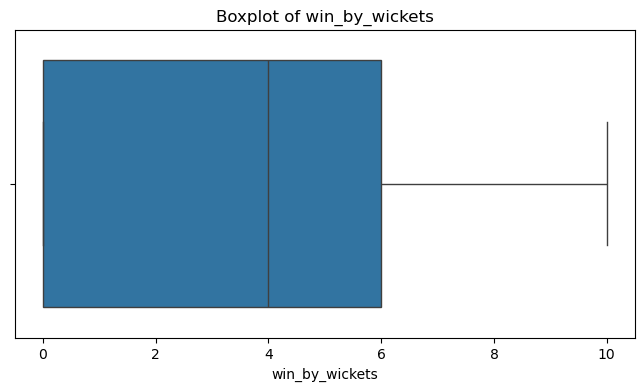

In [28]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['win_by_wickets'])
plt.title('Boxplot of win_by_wickets')
plt.show()

### **Inference:**
- Teams usually win with 4–6 wickets in hand.
- The distribution is **more balanced**, with **no major outliers**.

In [30]:
df[['win_by_runs', 'win_by_wickets']].max()

win_by_runs       146
win_by_wickets     10
dtype: int64

# 3. Exploratory Data Analysis (EDA):

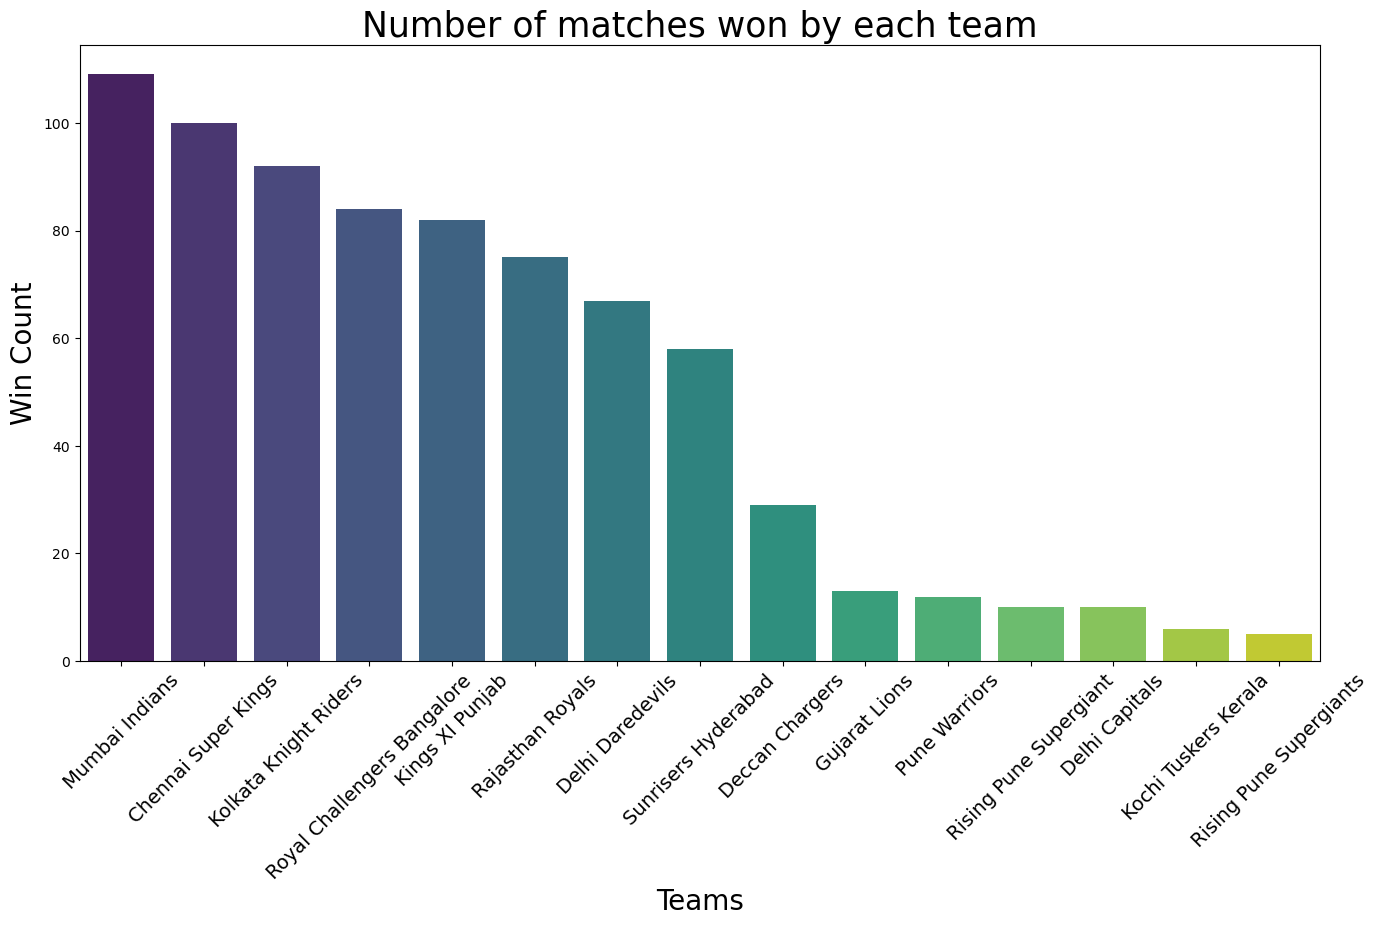

In [32]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'winner', data = data, order = data['winner'].value_counts().index, palette = 'viridis')
plt.title('Number of matches won by each team', fontsize = 25)
plt.xlabel('Teams', fontsize = 20)
plt.ylabel('Win Count', fontsize = 20)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

### **Inference**

1. **Mumbai Indians** and **Chennai Super Kings** have the highest number of match wins, making them the most successful teams in the dataset.
2. Teams like **Rising Pune Supergiant**, **Kochi Tuskers Kerala**, and **Gujarat Lions** have the fewest wins, indicating limited participation or lower performance.


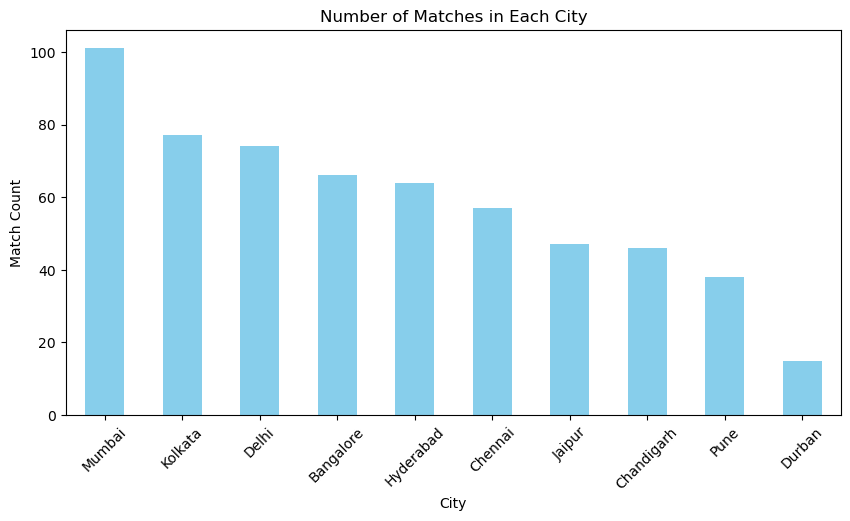

In [34]:
plt.figure(figsize=(10,5))
data['city'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Number of Matches in Each City')
plt.xlabel('City')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.show()

### **Inference**

1. **Mumbai** hosted the highest number of IPL matches, followed by **Kolkata**, **Delhi**, and **Bangalore**, indicating these are major venues.
2. Cities like **Durban**, **Pune**, and **Chandigarh** hosted comparatively fewer matches, suggesting limited use or occasional hosting.


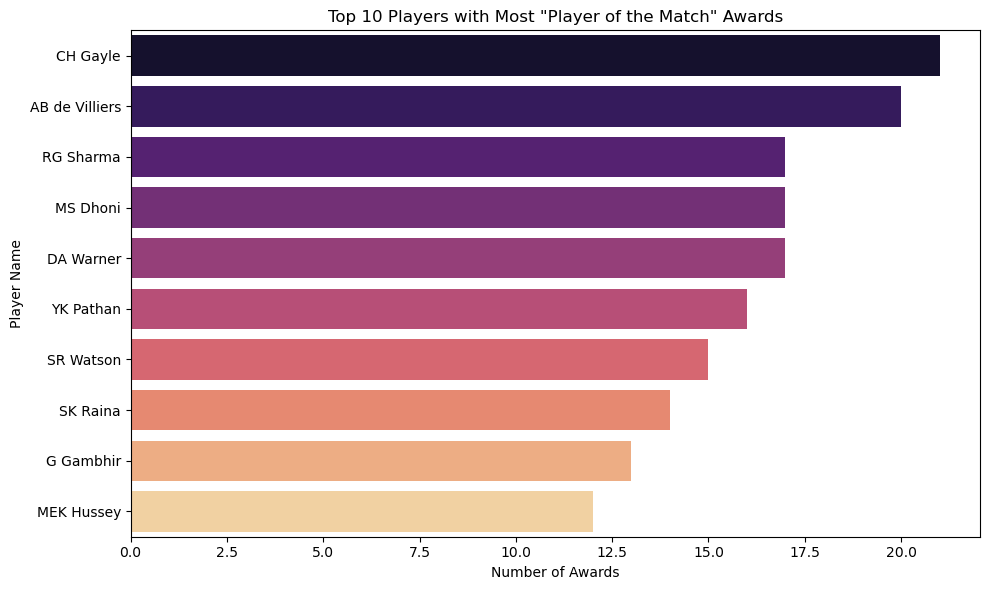

In [36]:
# Get top 10 players with most Player of the Match awards
top_players = data['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_players.values, y=top_players.index, palette='magma')
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

In [37]:
df['player_of_match'].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
NV Ojha            1
AC Voges           1
J Theron           1
WPUJC Vaas         1
S Hetmyer          1
Name: count, Length: 226, dtype: int64

In [38]:
df.drop(['player_of_match'], axis = 1, inplace = True)

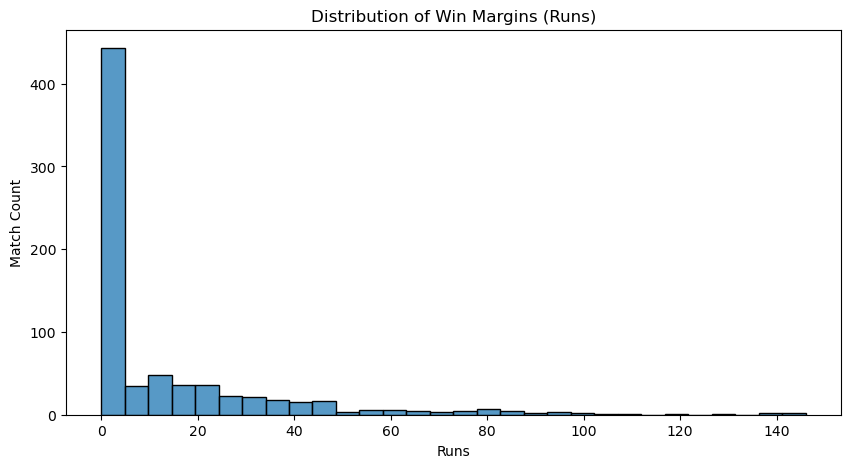

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['win_by_runs'], bins=30)
plt.title('Distribution of Win Margins (Runs)')
plt.xlabel('Runs')
plt.ylabel('Match Count')
plt.show()

### **Inference from Win Margin Distribution (Runs):**
This histogram illustrates the distribution of win margins by runs:
- The distribution is **right-skewed**, indicating that most matches are won by small margins, especially under 10 runs.
- Only a few matches are won by large margins (greater than 50 runs), making such outcomes rare in the dataset.

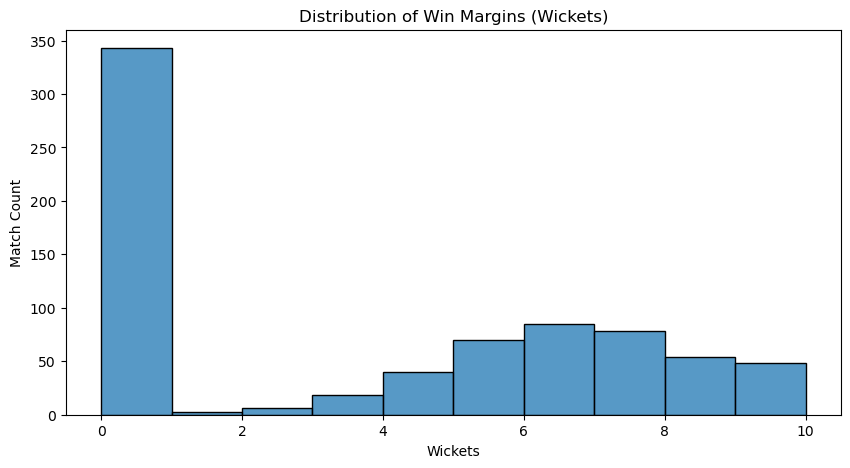

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df['win_by_wickets'], bins=10)
plt.title('Distribution of Win Margins (Wickets)')
plt.xlabel('Wickets')
plt.ylabel('Match Count')
plt.show()

### **Inference from Win Margin Distribution (Wickets):**
This histogram illustrates the distribution of win margins by wickets:
- The distribution shows a **noticeable peak around 6–8 wickets**, suggesting teams often win with a comfortable margin when chasing.
- Matches won by all 10 wickets or by very few wickets are less frequent, indicating such extremes are uncommon.

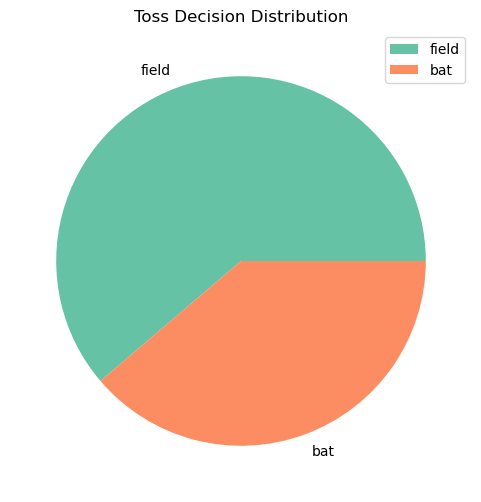

In [43]:
toss_counts = data['toss_decision'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(toss_counts, labels = toss_counts.index, colors=['#66c2a5', '#fc8d62'])
plt.title('Toss Decision Distribution')
plt.legend()
plt.show()

### **Inference from Toss Decision Distribution (Pie Chart):**
- Most teams chose to field first, showing a preference for chasing.
- Fewer teams chose to bat first, likely due to specific conditions.
- Overall, **chasing is more popular** in this.

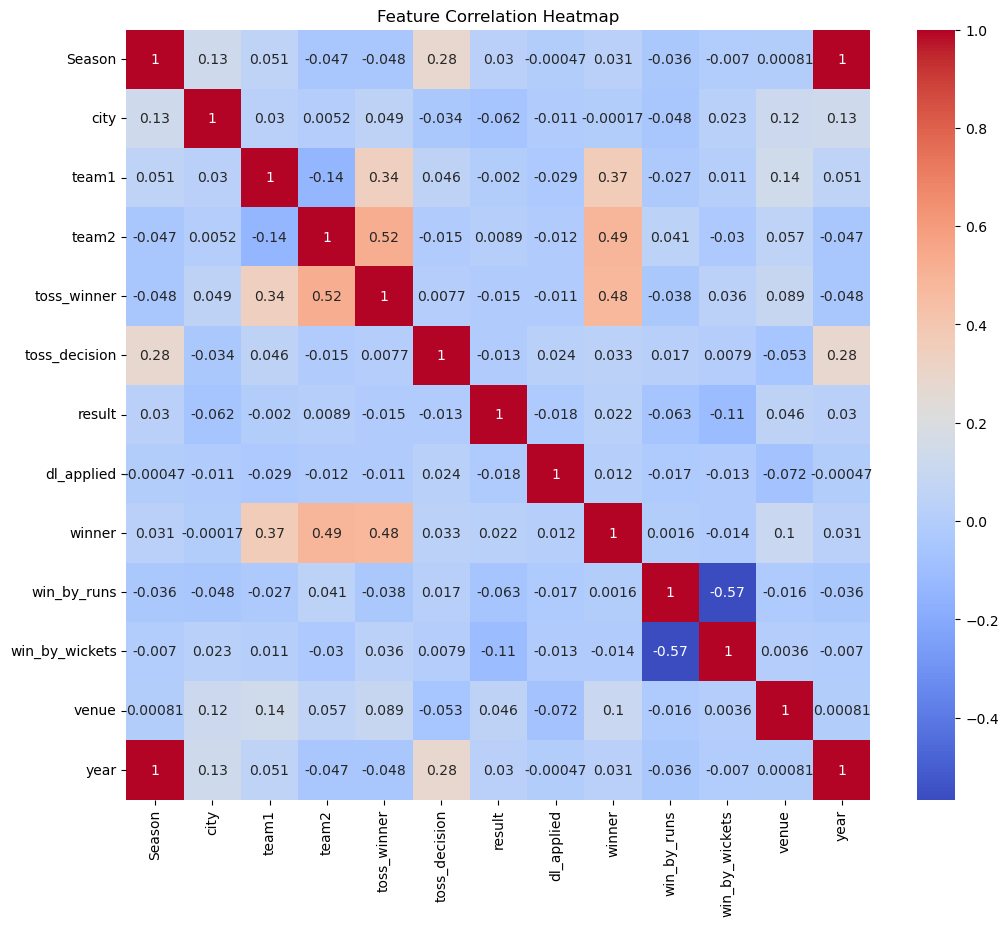

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### **Inference from Feature Correlation Heatmap:**
This heatmap displays the correlation between numerical features in the dataset:
1. **Strong positive correlation** is seen between:
   - **team1** and **team2** with **winner**
   - **toss_winner** and **winner**, suggesting winning the toss may increase the chance of winning the match.
2. **win_by_runs** and **win_by_wickets** have a **strong negative correlation** because a team can either wins by runs or by wickets, not both.
3. Most other features **show weak** or **no strong correlations**, indicating a variety of influencing factors in match outcomes.

## Hypothesis Testing

#### To test whether the toss winner has a statistically significant advantage in winning the match.

In [49]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['toss_winner'] == df['winner'], df['toss_winner'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table: ", contingency_table)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

alpha = 0.05

if p < alpha:
    print("\nReject the null hypothesis. Toss winner does significantly affect match result.")
else:
    print("\nFail to reject the null hypothesis. Toss winner does not significantly affect match result.")


Contingency Table:  toss_winner  0   1   2   3   4   5   6   7   8   9   10
row_0                                                  
False        32  47   5  46   4  38  40  35  22  39  47
True         57  42  10  34   4  53  56  42  11  40  41
Chi-Square Statistic: 19.03172078950592
Degrees of Freedom: 10
P-value: 0.039861625067564514

Reject the null hypothesis. Toss winner does significantly affect match result.


# 4. Data Preprocessing:

In [51]:
# Importing libraries

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [52]:
# Defining features and target

X = df.drop('winner', axis=1)
y = df['winner']

In [53]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [54]:
# Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Training:

--- Logistic Regression ---
Accuracy: 0.28859060402684567
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.52      0.48        25
           1       0.20      0.07      0.10        15
           2       0.00      0.00      0.00         2
           3       0.08      0.10      0.09        10
           5       0.30      0.44      0.36        18
           6       0.24      0.40      0.30        20
           7       0.18      0.11      0.14        18
           8       0.00      0.00      0.00         5
           9       0.31      0.19      0.24        21
          10       0.35      0.40      0.38        15

    accuracy                           0.29       149
   macro avg       0.21      0.22      0.21       149
weighted avg       0.27      0.29      0.27       149



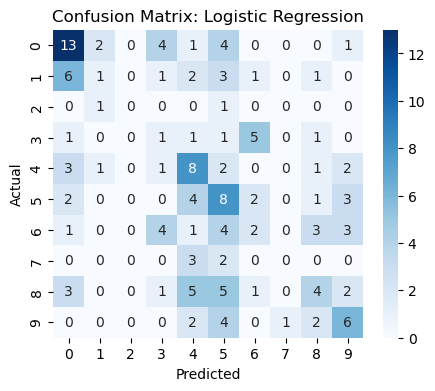

--- SVM ---
Accuracy: 0.40939597315436244
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53        25
           1       0.29      0.27      0.28        15
           2       0.00      0.00      0.00         2
           3       0.42      0.50      0.45        10
           5       0.44      0.61      0.51        18
           6       0.33      0.50      0.40        20
           7       0.29      0.22      0.25        18
           8       0.00      0.00      0.00         5
           9       0.46      0.29      0.35        21
          10       0.47      0.53      0.50        15

    accuracy                           0.41       149
   macro avg       0.32      0.34      0.33       149
weighted avg       0.39      0.41      0.39       149



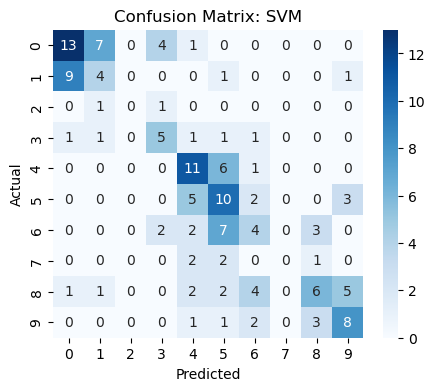

--- KNN ---
Accuracy: 0.3825503355704698
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.27      0.20      0.23        15
           2       0.33      0.50      0.40         2
           3       0.50      0.50      0.50        10
           4       0.00      0.00      0.00         0
           5       0.33      0.50      0.40        18
           6       0.21      0.30      0.24        20
           7       0.28      0.28      0.28        18
           8       0.00      0.00      0.00         5
           9       0.56      0.24      0.33        21
          10       0.54      0.47      0.50        15

    accuracy                           0.38       149
   macro avg       0.33      0.33      0.32       149
weighted avg       0.41      0.38      0.38       149



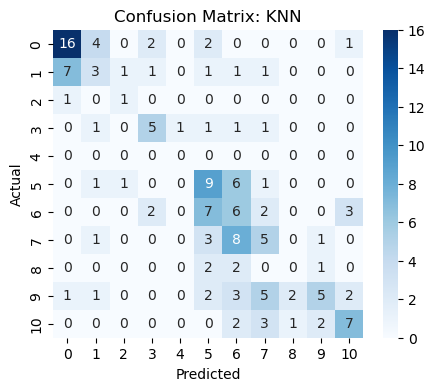

--- Decision Tree ---
Accuracy: 0.8389261744966443
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00         2
           3       0.69      0.90      0.78        10
           5       0.79      0.83      0.81        18
           6       0.95      0.95      0.95        20
           7       1.00      0.78      0.88        18
           8       0.50      1.00      0.67         5
           9       0.94      0.76      0.84        21
          10       0.93      0.93      0.93        15

    accuracy                           0.84       149
   macro avg       0.84      0.87      0.84       149
weighted avg       0.86      0.84      0.84       149



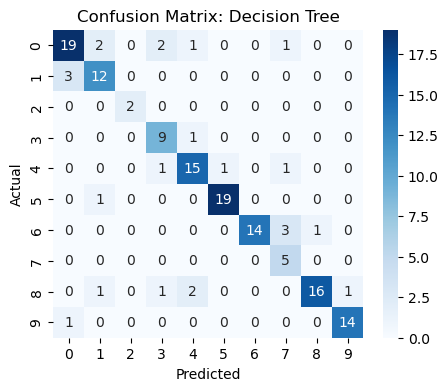

--- Random Forest ---
Accuracy: 0.8120805369127517
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      0.80      0.89        15
           2       1.00      1.00      1.00         2
           3       0.70      0.70      0.70        10
           5       0.75      0.83      0.79        18
           6       0.79      0.75      0.77        20
           7       0.74      0.78      0.76        18
           8       0.60      0.60      0.60         5
           9       0.75      0.71      0.73        21
          10       0.82      0.93      0.88        15

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.82      0.81      0.81       149



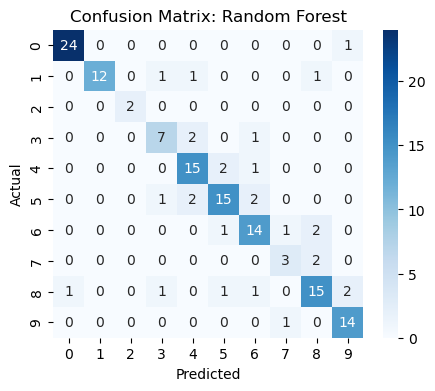

--- XGBoost ---
Accuracy: 0.9731543624161074
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         2
           3       1.00      0.80      0.89        10
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        20
           7       0.94      0.94      0.94        18
           8       1.00      1.00      1.00         5
           9       0.95      1.00      0.98        21
          10       1.00      1.00      1.00        15

    accuracy                           0.97       149
   macro avg       0.98      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



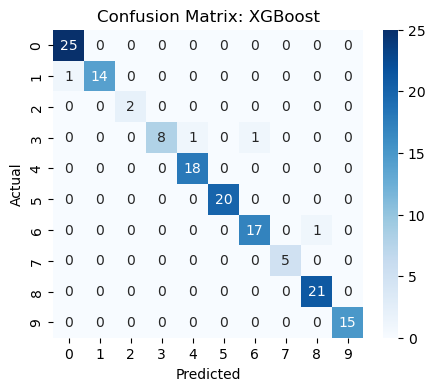

In [56]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 6. Model Evaluation:

In [58]:
# Comparing the performance of each model

performance = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    performance.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

performance_df = pd.DataFrame(performance)
performance_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.288591,0.269180,0.288591,0.267255
1,SVM,0.409396,0.392448,0.409396,0.393086
2,KNN,0.382550,0.406974,0.382550,0.381607
3,Decision Tree,0.838926,0.861077,0.838926,0.842905
4,Random Forest,0.812081,0.816480,0.812081,0.812355
5,XGBoost,0.973154,0.974071,0.973154,0.972527


In [59]:
# Identifing the best model by accuracy

best_model_name = performance_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
print(f"Best Performing Model: {best_model_name}")

Best Performing Model: XGBoost


In [60]:
best_model = models['XGBoost']
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
y_pred_best = best_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_best)

0.9731543624161074

In [63]:
confusion_matrix(y_test, y_pred_best)

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         2
           3       1.00      0.80      0.89        10
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        20
           7       0.94      0.94      0.94        18
           8       1.00      1.00      1.00         5
           9       0.95      1.00      0.98        21
          10       1.00      1.00      1.00        15

    accuracy                           0.97       149
   macro avg       0.98      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



# 7. Hyperparameter Tuning:

In [66]:
# Hyperparameter tuning

param_grid = {
    'n_estimators' : [100, 200, 500, 750], 
    'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
    'min_child_weight': [1, 5, 7, 10],
    'gamma': [0.1, 0.5, 1, 1.5, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 10, 12]
}

# Random Search
random_search = RandomizedSearchCV(estimator = best_model, param_distributions = param_grid,n_iter = 30,
                               cv = 3, verbose = 1, n_jobs =-1, scoring = 'f1_weighted')

In [67]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1_weighted', verbose=1)

In [68]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 1,
 'colsample_bytree': 0.8}

In [69]:
# Getting best estimator
xgb_model = random_search.best_estimator_

In [70]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         2
           3       0.90      0.90      0.90        10
           5       1.00      0.94      0.97        18
           6       0.95      1.00      0.98        20
           7       0.95      1.00      0.97        18
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        15

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149



In [71]:
# Finding feature importance
feature_importance = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

           Feature  Importance
4      toss_winner    0.190270
10           venue    0.150261
8      win_by_runs    0.113652
3            team2    0.107725
9   win_by_wickets    0.105596
1             city    0.097443
2            team1    0.093201
5    toss_decision    0.046233
0           Season    0.042111
11            year    0.028109
7       dl_applied    0.025400
6           result    0.000000


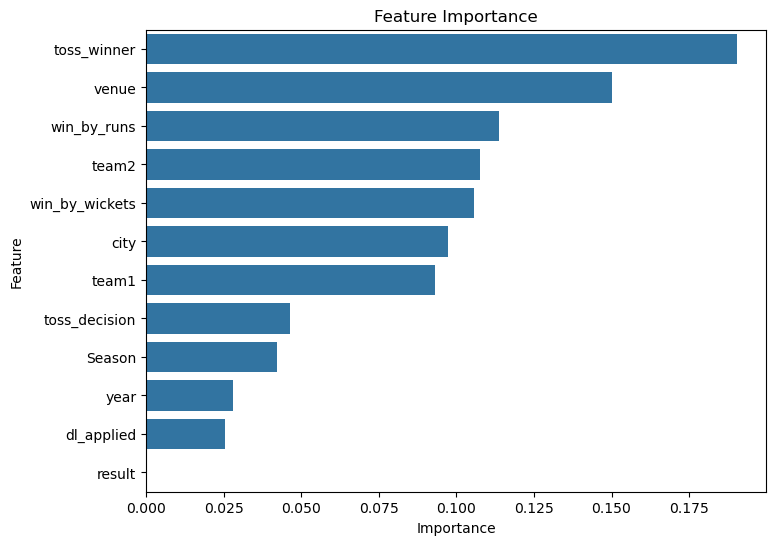

In [72]:
# Plotting Feature Importance
plt.figure(figsize = (8,6))
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df)
plt.title("Feature Importance")
plt.show()

# 8. Saving the model:

In [74]:
import pickle

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)